Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "In Wai Cheong"
COLLABORATORS = ""

---

In [2]:
from __future__ import print_function
import numpy
import matplotlib.pyplot as plt
import warnings

%matplotlib inline


# HW 3:  Root Finding and Optimization

## Question 1 - Fun with Fixed Point iteration

Let's say that we wanted to calculate $\sqrt{M}$ given that $M \in \mathbb{R}$ and $M > 0$ and that we did not want to use the function `sqrt` directly.  Consider the function 

$$
    f(x) = x^2 - M
$$

which has a positive root at at $x=\sqrt{M}$.   Here we will try to solve this using  fixed point iteration

$$
    x_{k+1} = g(x_k)
$$
for several different iteration functions $g(x)$ (see below)

For each function $g$:

- Confirm analytically that $x=\sqrt{M}$ is a fixed point of $g(x)$
- Analyze the convergence behavior close to the fixed-point and determine the stability of the iterative scheme
- Now set $M=3$  and $x_0 = 2$.  Make a nicely labeled convergence plot showing the log of the relative error as a function of iteration. How many iterations are required to reduce the relative error to machine precision (if it converges)?

**(a)** [4] To help with the last part,  write a short python function to return N iterations of a fixed point iteration.

In [3]:
def fixed_point(g, x0, N=5):
    """conduct N iterations of the fixed point iteration x_{k+1} = g(x_k)
    
    :Input:
        - *g* (function) - The iteration function
        - *x_0* (float) - Initial iterate
        - *N* (int) - number of terms in iteration
     
    :Output:
        x: numpy array (float)
            array containing the iterations [ x0, x1, ... x_N ]
    """
    x = numpy.empty(N+1)
    x[0] = x0
    for i in range(1,N+1):
        x[i] = g(x[i-1])
    return x

In [4]:
N = 5
g = lambda x: numpy.cos(x)
x0 = 1.
answer = numpy.array([1., 0.54030231, 0.85755322, 0.65428979,
                      0.79348036, 0.70136877])
x_true = 0.7390851332153119

x = fixed_point(g, x0, N )
numpy.testing.assert_allclose(x, answer)
x = fixed_point(g, x0, 1000)
numpy.testing.assert_almost_equal(x[-1],x_true)
print('success!')

success!


**(b)** [6] analyze the problem with 
$$ g(x) = 1 + x - \frac{x^2}{M}$$

## Analysis

We know that $\sqrt{3}\approx 1.732$. This function appears to converge to about that value after 3 iterations.

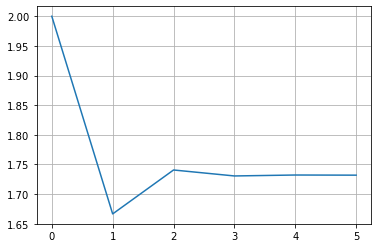

In [5]:
M = 3
x0 = 2.
g = lambda x: 1 + x - x**2/M

x = range(6)
y = fixed_point(g,x0,N=5)
plt.plot(x,y)
plt.grid()


 **(c)** [6] analyze the problem with 
$$ g(x) = \frac{M}{x}$$

## Analysis

$g(x)$ does not appear to converge to any value as it oscillates between $2.0$ and $1.5$

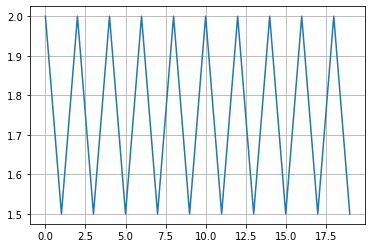

In [6]:
# YOUR CODE HERE
M = 3
x0 = 2.
g = lambda x: 3/x

x = range(20)
y = fixed_point(g,x0,N=19)
plt.plot(x,y)
plt.grid()

**(d)** [6] Newton's method
$$ g(x) = x - \frac{f}{f'}$$

with $$ f = x^2 - M$$

## Analysis

Using Newton's method, we see that it converges to approximately $\sqrt{3}$ after 2 iterations.

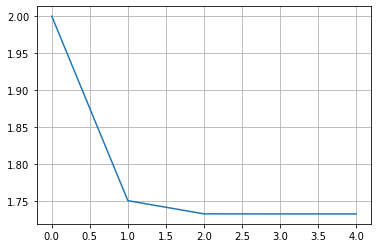

In [7]:
x0 = 2
g = lambda x: x - ((x**2 - 3) / (2*x))

x = range(5)
y = fixed_point(g,x0,N=4)
plt.plot(x,y)
plt.grid()


## Question 2 - Fun with Rootfinders and NewtSafe

This problem will explore the behavior of a range of different rootfinding routines against  a more challenging rootfinding problem.  Feel free to use all of the routines presented in class which have been included through the convenience cell

`%run rootfinding_optimization_schemes.ipynb`

You need to have this notebook in the same directory with your homework for this notebook to validate

In [8]:
#  Cell to load and test at least newton's method from class

%run rootfinding_optimization_schemes.ipynb

# set test function and it's derivative
f = lambda x: numpy.cos(x) - x
f_prime = lambda x: -numpy.sin(x) - 1.

#set initial guess and call newton
x0 = 1.
x, x_array = newton(f, f_prime, x0,tol=1.e-12)

# run tests
answer = 0.7390851332151606
N = 5
numpy.testing.assert_almost_equal(x, answer)
numpy.testing.assert_almost_equal(N, len(x_array))
print("functions loaded correctly")

functions loaded correctly


Consider the function 

$$
    f(x) = \cos(x) +  N(x, A, \alpha, \beta))
$$
where

$$
    N(x, A, \alpha, \beta) =  A\left[\sin(\alpha x) + \sin(\beta x)\right]
$$

is a function that adds smooth additive "noise" with fixed amplitude $A = 0.01$ and varying frequencies $\alpha$ and $\beta$

**(a)** [4] Make a nicely labeled plot to showing the behavior of this function for 
* $\alpha = 0.$, $\beta =0.$
* $\alpha = 4.$, $\beta =5.$
* $\alpha = 27$, $\beta = 50$

over the domain $x\in[-2\pi, 2\pi]$. Make sure you have enough points to resolve the wiggles

/opt/conda/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


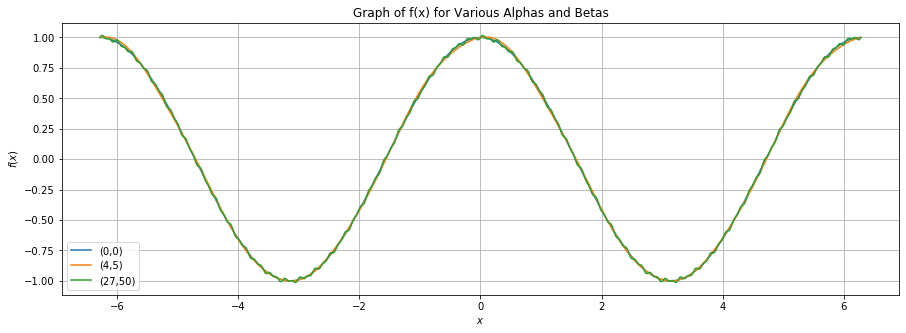

In [9]:
A = 0.01

x = numpy.arange(-2*numpy.pi,2*numpy.pi,0.0001)
f1 = numpy.cos(x) + A*(numpy.sin(0.*x) + numpy.sin(0.*x))
f2 = numpy.cos(x) + A*(numpy.sin(4.*x) + numpy.sin(5.*x))
f3 = numpy.cos(x) + A*(numpy.sin(27*x) + numpy.sin(50*x))

fig = plt.figure(figsize = (15,5))
axes = fig.add_subplot(1,1,1)
axes.set_title("Graph of f(x) for Various Alphas and Betas")
axes.set_xlabel("$x$")
axes.set_ylabel("$f(x)$")
axes.plot(x,f1,label="(0,0)")
axes.plot(x,f2,label="(4,5)")
axes.plot(x,f3,label="(27,50)")
axes.legend()
axes.grid()



**(b)** [4] Explore the behavior of the following rootfinding routines 
* bisection
* newton
* secant
* scipy.optimize.brentq

for finding a root of this function, given the bracket $x\in[x_0, x_1]$ with $x_0 = 0.44$, $x_1 = 2.$ for each ($\alpha, \beta$) pair

`params = [ (0., 0.), (4., 5.),  (27, 50.) ]`

For each routine,  report
* the root found $x^*$
* the value of $f$ at the root $f(x^*$)
* the number of iterations.

## Report

Relative to the parameters $(0,0),(4,5),(27,50)$, the following roots were found:

Bisection: $1.570796775817871, 1.5811989974975584, 1.5811989974975584$ <br>
Newton: $1.570796326795021, -26.693932340371024, 1.5641949307360206$ <br>
Secant: $1.570796326795379, 1.5811989738691858, 1.5641954939592606$ <br>
Scipy.optimize: $1.570796326795379, 1.581198976494957, 1.5641954975580332$

In [10]:
#Bisection

x = numpy.linspace(0.44,2,100)
A = 0.01
a = 0.44
b = 2
f1 = lambda x,a=a,b=b: numpy.cos(x) + A*(numpy.sin(0 * x) + numpy.sin(0 * x))
f2 = lambda x,a=a,b=b: numpy.cos(x) + A*(numpy.sin(4 * x) + numpy.sin(5 * x))
f3 = lambda x,a=a,b=b: numpy.cos(x) + A*(numpy.sin(27 * x) + numpy.sin(50 * x))

print(bisection(f1,a,b,tol = 1.e-6, max_steps=1000))
print(bisection(f2,a,b,tol = 1.e-6, max_steps=1000))
print(bisection(f2,a,b,tol = 1.e-6, max_steps=1000))



(1.570796775817871, array([1.22      , 1.61      , 1.415     , 1.5125    , 1.56125   ,
       1.585625  , 1.5734375 , 1.56734375, 1.57039062, 1.57191406,
       1.57115234, 1.57077148, 1.57096191, 1.5708667 , 1.57081909,
       1.57079529, 1.57080719, 1.57080124, 1.57079826, 1.57079678]))
(1.5811989974975584, array([1.22      , 1.61      , 1.415     , 1.5125    , 1.56125   ,
       1.585625  , 1.5734375 , 1.57953125, 1.58257812, 1.58105469,
       1.58181641, 1.58143555, 1.58124512, 1.5811499 , 1.58119751,
       1.58122131, 1.58120941, 1.58120346, 1.58120049, 1.581199  ]))
(1.5811989974975584, array([1.22      , 1.61      , 1.415     , 1.5125    , 1.56125   ,
       1.585625  , 1.5734375 , 1.57953125, 1.58257812, 1.58105469,
       1.58181641, 1.58143555, 1.58124512, 1.5811499 , 1.58119751,
       1.58122131, 1.58120941, 1.58120346, 1.58120049, 1.581199  ]))


In [11]:
#Newton

A = 0.01
x0 = 0.44

f_prime1 = lambda x: -numpy.sin(x) + A*(0*numpy.sin(0 * x) + 0*numpy.sin(0 * x))
f_prime2 = lambda x: -numpy.sin(x) + A*(4*numpy.sin(4 * x) + 5*numpy.sin(5 * x))
f_prime3 = lambda x: -numpy.sin(x) + A*(27*numpy.sin(27 * x) + 50*numpy.sin(50 * x))

print(newton(f1, f_prime1, x0, tol=1.e-6, max_steps=200))
print(newton(f2, f_prime2, x0, tol=1.e-6, max_steps=200))
print(newton(f3, f_prime3, x0, tol=1.e-6, max_steps=200))

(1.570796326795021, array([0.44      , 2.56413204, 1.02931879, 1.63075863, 1.57072436,
       1.57079633]))
(-26.693932340371024, array([  0.44      ,   3.10488242, -26.77879206, -26.68564327,
       -26.69471923, -26.69385798, -26.69394018, -26.69393234]))
(1.5641949307360206, array([0.44      , 1.9335424 , 0.98232257, 1.52592757, 1.59586969,
       1.57072934, 1.56292416, 1.56472651, 1.56400338, 1.56426926,
       1.56416778, 1.564206  , 1.56419153, 1.564197  , 1.56419493]))


In [12]:
#Secant

A = 0.01
x0 = 0.44
x1 = 2

print(secant(f1, x0, x1, tol=1.e-6, max_steps=100))
print(secant(f2, x0, x1, tol=1.e-6, max_steps=100))
print(secant(f3, x0, x1, tol=1.e-6, max_steps=100))

(1.570796326795379, array([0.44      , 2.        , 1.50852464, 1.57245987, 1.57079528,
       1.57079633]))
(1.5811989738691858, array([0.44      , 2.        , 1.51868624, 1.57962445, 1.58121202,
       1.58119897]))
(1.5641954939592606, array([0.44      , 2.        , 1.49755239, 1.57021792, 1.56205571,
       1.56419834, 1.56419549]))


In [13]:
#Scipy.optimize
import scipy
from scipy.optimize import brentq

print(scipy.optimize.brentq(f1,0.44,2))
print(scipy.optimize.brentq(f2,0.44,2))
print(scipy.optimize.brentq(f3,0.44,2))

1.570796326795379
1.581198976494957
1.5641954975580332


**(c)** [4] Make a convergence plot showing the relative error at each step for Newton's method for the same three parameter pairs and initial guess $x_0 = 0.44$.

In [14]:
#Defined a secondary newton's method function that returns only the arrays

def newton2(f, f_prime, x0, tol=1.e-6, max_steps=200):
    
    MAX_STEPS = max_steps
    
    x = x0
    x_array = [ x0 ]
    for k in range(1, MAX_STEPS + 1):
        x = x  - f(x) / f_prime(x)
        x_array.append(x)
        if numpy.abs(f(x)) < tol:
            break
        
    if k == MAX_STEPS:
        warnings.warn('Maximum number of steps exceeded')
    
    return numpy.array(x_array)

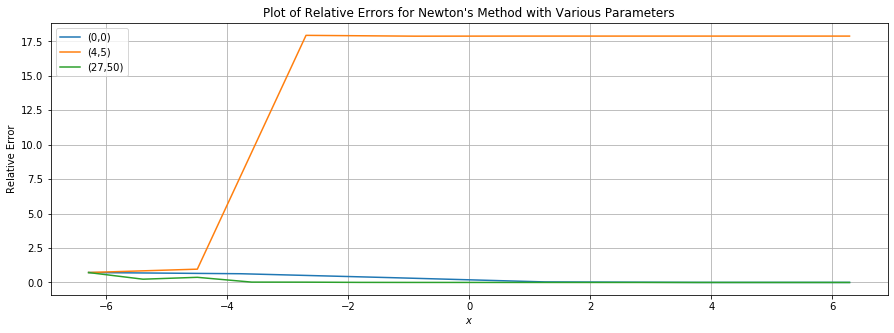

In [15]:
n1 = newton2(f1, f_prime1, x0, tol=1.e-6, max_steps=200)
n2 = newton2(f2, f_prime2, x0, tol=1.e-6, max_steps=200)
n3 = newton2(f3, f_prime3, x0, tol=1.e-6, max_steps=200)
x = numpy.linspace(-2*numpy.pi,2*numpy.pi,6)
x2 = numpy.linspace(-2*numpy.pi,2*numpy.pi,8)
x3 = numpy.linspace(-2*numpy.pi,2*numpy.pi,15)

aa = numpy.abs(1.570796326795379 - n1) / numpy.abs(1.570796326795379)
bb = numpy.abs(1.581198976494957 - n2) / numpy.abs(1.581198976494957)
cc = numpy.abs(1.5641954975580332 - n3) / numpy.abs(1.5641954975580332)



fig = plt.figure(figsize = (15,5))
axes = fig.add_subplot(1,1,1)
axes.set_title("Plot of Relative Errors for Newton's Method with Various Parameters")
axes.set_xlabel("$x$")
axes.set_ylabel("Relative Error")
axes.plot(x,aa,label="(0,0)")
axes.plot(x2,bb, label="(4,5)")
axes.plot(x3,cc,label="(27,50)")

axes.legend()
axes.grid()


**(d)** [4] Briefly explain your results so far.  Feel free to play with other initial parameters or to make additional plots.  

## Analysis

The parameters $(0,0)$ and $(27,50)$ seems to approach a relative error of near $0$ but the $(4,5)$ parameter diverges for some reason.

**(e)** [6] *Basins of Attraction* For the noisiest model $(\alpha=27, \beta=50)$, make a plot of the final root $x^*$ that Newton finds as a function of initial guess $x_0\in [0.4, 2.]$ (hint plt.ylim is your friend).  Can you estimate the width of the smooth basin of attraction near the root $x^*\approx\pi/2$?

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Maximum number of steps exceeded


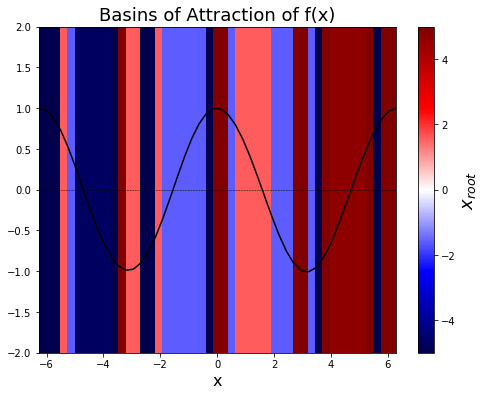

In [16]:
# YOUR CODE HERE
x = numpy.linspace(-2*numpy.pi,2*numpy.pi)
x_root = numpy.zeros(x.shape)
N_steps = numpy.zeros(x.shape)
for i,x0 in enumerate(x):
    x_root[i], x_root_array = newton(f3, f_prime3, x0)
    N_steps[i] = len(x_root_array)

y = numpy.linspace(-2,2)
X,Y = numpy.meshgrid(x,y)
X_root = numpy.outer(numpy.ones(y.shape),x_root)

plt.figure(figsize=(8, 6))
plt.pcolor(X, Y, X_root,vmin=-5, vmax=5,cmap='seismic')
cbar = plt.colorbar()
cbar.set_label('$x_{root}$', fontsize=18)
plt.plot(x, f3(x), 'k-')
plt.plot(x, numpy.zeros(x.shape),'k--', linewidth=0.5)
plt.xlabel('x', fontsize=16)
plt.title('Basins of Attraction of f(x)', fontsize=18)
plt.show()    


YOUR ANSWER HERE

**(e)** [6] Write a controlled Newton routine `NewtSafe`,  that finds a root with an initial bracket by combining newton steps with a bisection routine.  The basic algorithm is to first try Newton from the midpoint of the bracket.  If Newton predicts a solution outside of the bracket, ignore it and take a bisection step instead.  You can use and modify any of the rootfinding routines I presented in class, but write a decent docstring and raise appropriate exceptions as necessary. 

The routine should return the best estimate of the root and number of Newton Steps and the number of bisection steps

x, N_newt, N_bisection = newtsafe(f, f_prime, a, b)

In [17]:
def newtsafe(f,f_prime,a,b,tol = 1.e-6, max_steps=1000):
    """ Please improve this docstring
           
    Parameters:
    -----------
    
    f: function (float)
        function giving f(x)
    f_prime:  function (float)
        function giving derivative of f with respect to x
    a: float
        left bracket a < x
    b: float
        right bracket x < b
        
        Note:  the signs of f(a) and f(b) must be different to insure a bracket
    tol: float
        tolerance.  Returns when |f((a+b)/2)| < tol
    max_steps: int
        maximum number of iteration steps
        
    Returns:
    --------
    x: float
        midpoint of final bracket
    n_newt:  number of newton steps for successful newton iteration
    n_bisection: number of bisection steps
        
    Raises:
    -------
    ValueError:  
        if initial bracket is invalid 
    Warning: 
        if number of iterations exceed MAX_STEPS
    Prints warning if Newton exceeds the bracket
    
    """
    # YOUR CODE HERE

    n_newt = 0
    n_bisection = 0
    x = (a+b)/2
    x_array = [x]
    
    #Bracket Check
    if numpy.sign(f(a)) == numpy.sign(f(b)):
        raise ValueError("no bracket: f(a) and f(b) must have different signs")
        
    for step in range(1, max_steps + 1):
        if numpy.abs(f(x)) < tol:
            break  
        #Newton Step
        x_new = x - f(x) / f_prime(x)
        if x_new<a or x_new>b:
            #Bisection Step
            n_bisection += 1
            if (numpy.sign(f(a)) != numpy.sign(f(x))):
                b = x
            else:
                a = x
            delta_x = b - a
            x_new = a + delta_x / 2.0
        else:
            n_newt += 1
        x = x_new
        x_array.append(x)

        if step == max_steps:
            warnings.warn('Maximum number of steps exceeded')
        
    return x, n_newt, n_bisection



In [18]:
a = 27
b = 50
A = 0.3
f = lambda x: numpy.cos(x) + A*(numpy.sin(a * x) + numpy.sin(b * x))
f_prime = lambda x: -numpy.sin(x) + A*(a*numpy.sin(a * x) + b*numpy.sin(b * x))

pi = numpy.pi

brackets = [ 
            (-0.68309670780092, 2.642524050776319),
            (-0.7104536143852529, 3.8152626763086603),
            (-0.5236057894835726, 3.9067882124238986),
            (-0.5275356434135271, 2.4988039593212776),
            (-0.3534683303763972, 3.9130408021252014)
           ]

for bracket in brackets:
    #a = numpy.random.uniform(low=-pi/4, high=pi/4)
    #b = numpy.random.uniform(low=3*pi/4, high=5*pi/4)
    a = bracket[0]
    b = bracket[1]
    x_n, x_array = newton(f, f_prime, (a + b)/2.)
    x_ns, N_n, N_b = newtsafe(f, f_prime, a, b)
    x_b, res = brentq(f, a, b, full_output=True)
    print('Bracket  = [{}, {}]'.format(a, b))
    print('Newton   = {},    N   = {}'.format(x_n, len(x_array)-1))
    print('NewtSafe = {},    N_n = {}, N_b = {}'.format(x_ns, N_n, N_b))
    print('brentq   = {},    N   = {}'.format(x_b, res.iterations))
    print()
    numpy.testing.assert_almost_equal(x_ns, x_b,decimal=6)
    
try:
    x_ns, N_n, N_b = newtsafe(f, f_prime, 1.6, 2.0)
except ValueError as err:
    print(err)
    pass

print('success!')


Bracket  = [-0.68309670780092, 2.642524050776319]
Newton   = 12.052997501142706,    N   = 200
NewtSafe = 1.2719479757131404,    N_n = 118, N_b = 1
brentq   = 1.2719484732512498,    N   = 9

Bracket  = [-0.7104536143852529, 3.8152626763086603]
Newton   = 1.088499606524573,    N   = 6
NewtSafe = 1.088499606524573,    N_n = 6, N_b = 0
brentq   = 1.088499013515958,    N   = 13

Bracket  = [-0.5236057894835726, 3.9067882124238986]
Newton   = 1.1106145034417199,    N   = 10
NewtSafe = 1.1106145034417199,    N_n = 10, N_b = 0
brentq   = 1.1106142646873127,    N   = 11

Bracket  = [-0.5275356434135271, 2.4988039593212776]
Newton   = 8.943400174973013,    N   = 200
NewtSafe = 1.3248585504689192,    N_n = 63, N_b = 1
brentq   = 1.3248590968150393,    N   = 9

Bracket  = [-0.3534683303763972, 3.9130408021252014]
Newton   = 14.145648952501228,    N   = 64
NewtSafe = 1.1473187650756176,    N_n = 16, N_b = 2
brentq   = 1.1473182519138232,    N   = 9

no bracket: f(a) and f(b) must have different sig

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:40: UserWarning: Maximum number of steps exceeded


## Question 3 - Solve some "real" rootfinding problems

Each of the following math problems will lead to a non-linear function of a single variable that will require solution by rootfinding.  For each problem, derive the non-linear function and use the rootfinding routine of your choice (or try several),  to determine the numerical solution.

**(a)** [8] provide a numerical solution for the number of terms $n$ in the Taylor polynomial expansion of exp(x) (i.e. $T_N(x))$ such that the relative error is

$$
    r = \left| \frac{x^{n+1}}{(n + 1)!} \right| \approx \epsilon_{mach}
$$ 

Give solutions for x = 10,100, 709, 1000 and compare your numerical solution to the approximate solution given in last homework 

$$
    n > e*x
$$

by calculating the relative error between the your numerical solution and your simpler estimate.

Note: To make this problem easier, just use Stirling’s approximation $\log(n!) \approx n \log n − n$. which will work quite well.  However, for a little bit of extra credit solve this for the full problem and compare solutions.


## Solution

For our previous homework routine, for $x=10,100,709,1000$, our number of terms are <br>
$80, 350, 2177, 3050$ terms, respectively <br>

For our numerical routine, our number of numbers are <br>
$26, 271, 1926, 2717$ terms, respectively.

In [27]:
#Approximate solution from last homework

def Tn_exp(x):

    assert(isinstance(x,float))
    
    use_inv = False
    if x<0:
        x = abs(x)
        use_inv = True
        
    MAX_N = int(numpy.ceil(3*x))+50
    
    p = []
    for n in range(MAX_N + 1):
        p.append(1 / factorial(n))    
    p.reverse()    
    
    Tn = p[0]
    for coefficient in p[1:]:
        Tn = Tn * x + coefficient
        
    if use_inv:
        Tn = 1/Tn

    return MAX_N

print("For x = 10,",Tn_exp(10.),"terms.")
print("For x = 100,",Tn_exp(100.),"terms.")
print("For x = 709,",Tn_exp(709.),"terms.")
print("For x = 1000,",Tn_exp(1000.),"terms.")

For x = 10, 80 terms.
For x = 100, 350 terms.
For x = 709, 2177 terms.
For x = 1000, 3050 terms.


In [90]:
# YOUR CODE HERE

x = 10.
x0 = 10
f = lambda n: numpy.log(x) + 1 - numpy.log(n+1)
f_prime = lambda n: -1/(n+1)
print(newton(f, f_prime, x0, tol=1.e-6, max_steps=200))

x = 100.
x0 = 10
f = lambda n: numpy.log(x) + 1 - numpy.log(n+1)
f_prime = lambda n: -1/(n+1)
print(newton(f, f_prime, x0, tol=1.e-6, max_steps=200))

x = 709.
x0 = 10
f = lambda n: numpy.log(x) + 1 - numpy.log(n+1)
f_prime = lambda n: -1/(n+1)
print(newton(f, f_prime, x0, tol=1.e-6, max_steps=200))

x = 1000.
x0 = 10
f = lambda n: numpy.log(x) + 1 - numpy.log(n+1)
f_prime = lambda n: -1/(n+1)
print(newton(f, f_prime, x0, tol=1.e-6, max_steps=200))



(26.182815983178017, array([10.        , 19.95158802, 25.40676659, 26.17163345, 26.18281598]))
(270.8281805513369, array([ 10.        ,  45.28002405, 127.2169445 , 223.56511584,
       266.45805735, 270.79286426, 270.82818055]))
(1926.2617672330164, array([  10.        ,   66.82556279,  293.83204922,  847.36437891,
       1543.48577501, 1885.44917241, 1925.82659899, 1926.26176723]))
(2717.281293897734, array([  10.        ,   70.60846007,  331.01563657, 1029.10282035,
       2028.65420966, 2621.58635225, 2715.57725547, 2717.2812939 ]))
